In [23]:
import os
import charts_function_list, date_functions
import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
from calendar import isleap

In [2]:
_, data, outputs = charts_function_list.folder_setup()

In [319]:
os.chdir(data)
statehood = pd.read_csv('statehood.csv')

In [320]:
statehood = statehood[1:].reset_index(drop=True)

In [417]:
pd.Series(statehood['State'].unique()).sort_values().values

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [397]:


state_recode={'alabama':'AL',
              'alaska':'AK',
              'arizona':'AZ',
              'arkansas':'AR',
              'california':'CA',
              'colorado':'CO',
              
    'delaware':'DE','pennsylvania':'PA','new jersey':'NJ',
'georgia':'GA','connecticut':'CT','massachusetts':'MA','maryland':'MD',
'south carolina':'SC','new hampshire':'NH','virginia':'VA','new york':'NY','north carolina':'NC','rhode island':'RI',
             'arkansas':'AR','west virginia':'WV','idaho':'ID','wyoming':'WY'}

statehood['Abbreviation']=statehood['State'].str.lower().map(state_recode).fillna('')

In [321]:
statehood['Date Admitted'] = pd.to_datetime(statehood['Date Admitted'])
def date_as_float(dt_):
        size_of_day = 1. / 366.
        size_of_second = size_of_day / (24. * 60. * 60.)
        days_from_jan1 = dt_ - datetime(dt_.year, 1, 1)
        if not isleap(dt_.year) and days_from_jan1.days >= 31+28:
            days_from_jan1 += timedelta(1)
        return days_from_jan1.days * size_of_day + days_from_jan1.seconds * size_of_second
    

statehood['Month Fraction']=statehood['Date Admitted'].apply(date_as_float)

In [365]:
#color formatting
#SD formula but in relation to 4th of July
relation_to_foj = (((statehood['Month Fraction']-date_as_float(pd.to_datetime('7/4/1776')))**2).sum())/51
statehood['Score']=((statehood['Month Fraction']-date_as_float(pd.to_datetime('7/4/1776')))/relation_to_foj)


def score_recode(df):
    if df['Score']>=2:
        return '#ca0020'
    elif df['Score']>1:
        return '#f4a582'
    elif df['Score']>-1:
        return '#f7f7f7'
    elif df['Score']>-2:
        return '#92c5de'
    else:
        return '#0571b0'
    
statehood['Color']=statehood.apply(score_recode,axis=1)

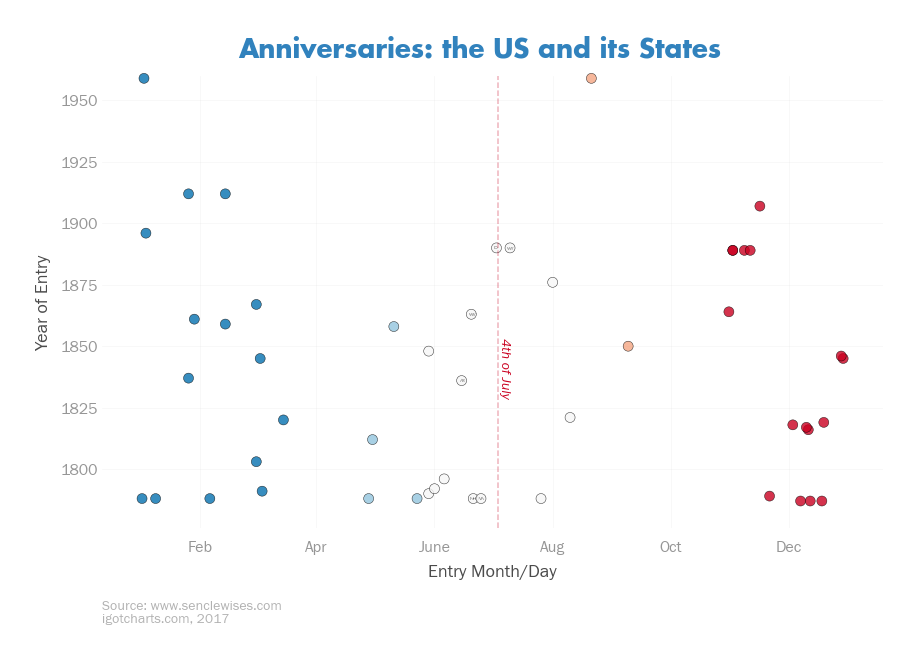

In [422]:
my_chart = charts_function_list.chart_maker(title='Anniversaries: the US and its States')
fig = my_chart.initial_fig_axis((14,8))
fig.suptitle(my_chart.title,color='#3182bd',size=26,fontname='Futura-Bold')
fig.subplots_adjust(top=.91)
ax = my_chart.axes_set_up(fig)
ax.scatter(statehood['Month Fraction'],statehood['Year'],color=statehood['Color'],zorder=2,alpha=.8,clip_on=False,linewidth=.5,s=100,edgecolors='black')

#hexbin with color bar
#plt.hexbin(statehood['Month Fraction'],statehood['Year'],gridsize=10,cmap='Greys',zorder=1,linewidths=.1)
#cb = plt.colorbar()
#cb.set_label('Count within each hexagon',fontsize=16,color='#969696')
#cb.ax.set_yticklabels([0,'',1,'',2,'',3],fontsize=16,color='#636363')

ax.vlines(x=0.505464480874317,ymin=1776,ymax=1960,linestyles='--',color='#ca0020',alpha=.3)
ax.set_ylim(1776,1960)
ax.set_ylabel('Year of Entry',fontsize=18,alpha=.7)
ax.set_xlabel('Entry Month/Day',fontsize=18,alpha=.7)
ax.set_xticks([date_as_float(pd.to_datetime(str(x)+'-1-2015'))for x in [2,4,6,8,10,12]])
ax.set_xticklabels(['Feb','Apr','June','Aug','Oct','Dec'],position=(.5,-.02))
ax.text(.507,1850,'4th of July',style='italic',color='#ca0020',rotation=-90,fontsize=14)
my_chart.citations(ax,source=statehood.columns[6],source_y=-.18,chart_tag_y=-.21,chart_tag='igotcharts.com, 2017',color='black',alpha=.3)

label_value = statehood[(statehood['Score']>=-.5)&(statehood['Score']<=.5)].index
for item in label_value:
    ax.text(statehood['Month Fraction'][item],statehood['Year'][item],
            statehood['Abbreviation'][item],color='black',alpha=.6,fontsize=5,ha='center',va='center',fontname='Futura Bk BT',zorder=4)
    
my_chart.tick_params_(ax)
os.chdir(outputs)
charts_function_list.chart_save('us_and_states_no_hex')
plt.show()